### [Credit card](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) default data set from UCI-ML Repository
#### A classification problem with: 
- 30,000 client data, 
- 23 variables (or inputs), 
- 1 binary output
- no missing values

In [1]:
# Import libraries and settings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (8, 8)
matplotlib.rcParams.update({'font.size': 16})
from matplotlib.ticker import MaxNLocator
import seaborn as sns

### Import data, split in train (10,000) and test (20,000) data points

In [2]:
# Import data and rename column
cc_data = pd.read_excel('cc_data_uci.xls')
cc_data.rename(columns={'default payment next month': 'OUTPUT'}, inplace = True)
# Separate inputs: X and output:y
X = cc_data.drop(['OUTPUT'], axis = 1)
y = cc_data['OUTPUT']

In [3]:
# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/3, random_state=23)

### - Create the simplest Decision Tree Classifiers <br> - Fit the classifier <br> - Draw the leaves and observe their distribution

In [4]:
estimator = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth = 1)
model_dt  = estimator.fit(X_train, y_train)

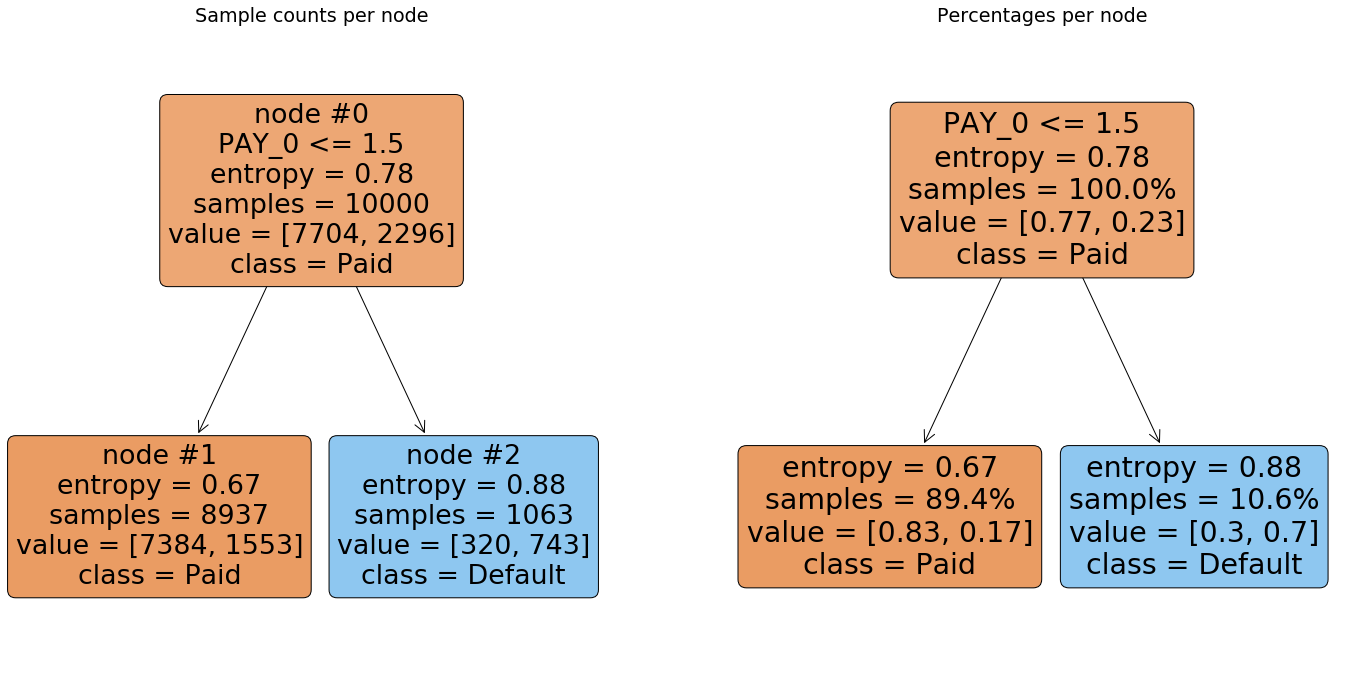

In [5]:
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
axs1 = plot_tree(estimator, filled=True, feature_names = list(X.columns), class_names = ['Paid', 'Default'], rounded = True, precision = 2, node_ids=True)
fig_1_a.set_title('Sample counts per node')

fig_1_b = plt.subplot(122)
axs2 = plot_tree(estimator, filled=True, feature_names = list(X.columns), class_names = ['Paid', 'Default'], rounded = True, precision = 2, proportion=True)
fig_1_b.set_title('Percentages per node')

plt.show()

### How to read the tree:
- Observe nodes 0, 1 and 2. Node 0 has the whole population.
- The second line in node 0 is the condition: IF PAY_0 <= 1.5 THEN:
- IF TRUE go to node 1
- IF FALSE go to node 2
- Nodes 1 and 2 have information like entropy, samples, [-ves, +ves] and the class of the majority in the node (Paid or Default)
- Notice that each node is coloured with the class of the majority. Also, darker colour implies higher probability of the majority class (will become obvious later with more branches).

### Tree components and terms:
- **Root node**: the top-level node showing the entire population
- **Branch**: the arrows that stem from the root showing a decision taken (a split of the population)
- In the tree above, the population is split with the decision IF PAY_0 <= 1.5
- **Leaf nodes**: the end nodes that do not split any further. In this simple case with depth=1, the first 2 nodes are leaf nodes.
- Next, we will run "deeper" trees which will have more leaves.

### Next, open up the Decision Tree Classifier documentation in [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and explore the different parameters before changing them and observe what happens to the tree. In particular, change:
- **max_depth**: from 2-6 manually, any observations? Some leaf nodes have very few samples. Not statistically confident in those.
- **min_samples_split**: minimum number of samples to split an internal node. Fixes the above issue of statistical confidence.
- **min_samples_leaf**: minimum number of samples to be at a leaf node. Similar behaviour to the above (creates more leaf nodes though).

### What is entropy and gini index?
<img src="Entropy.png" width="350"> <img src="Entropy_and_Gini.png" width="650">

In [6]:
estimator = DecisionTreeClassifier(criterion = 'entropy', random_state=0, min_samples_split = 1000)
model_dt  = estimator.fit(X_train, y_train)

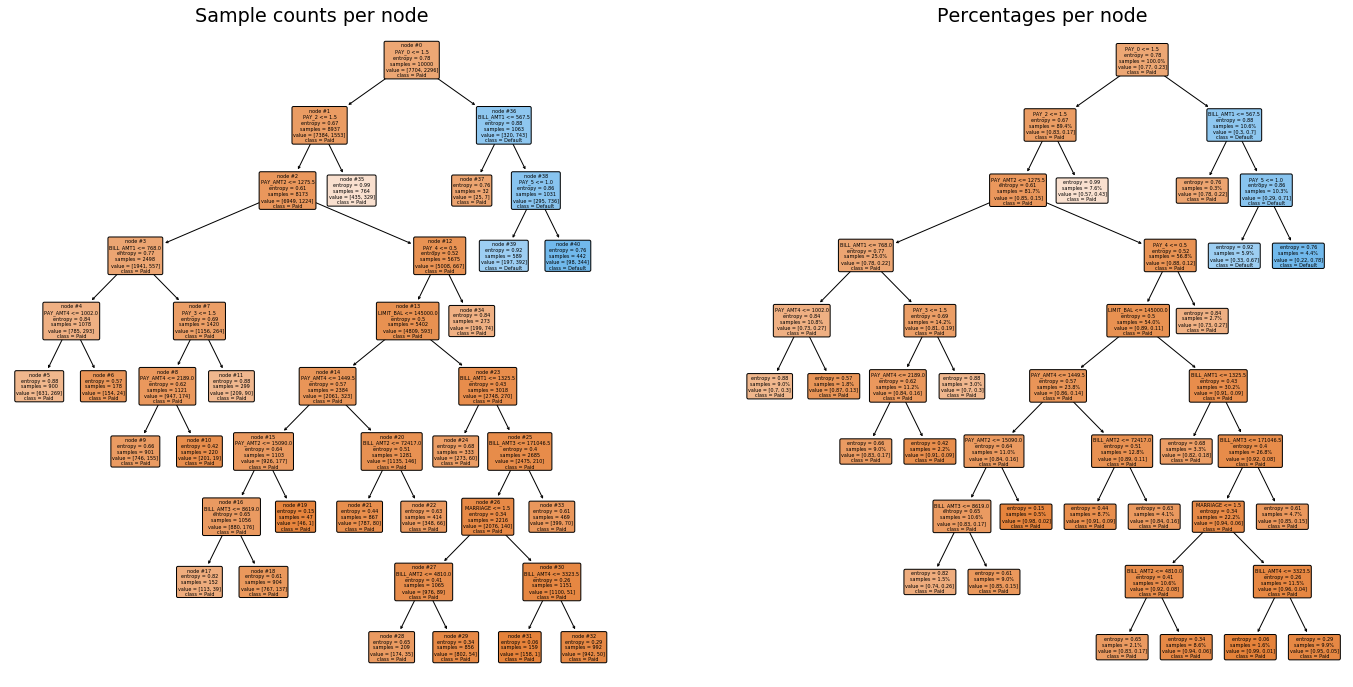

In [7]:
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
axs1 = plot_tree(estimator, filled=True, feature_names = list(X.columns), class_names = ['Paid', 'Default'], rounded = True, precision = 2, node_ids=True)
fig_1_a.set_title('Sample counts per node')

fig_1_b = plt.subplot(122)
axs2 = plot_tree(estimator, filled=True, feature_names = list(X.columns), class_names = ['Paid', 'Default'], rounded = True, precision = 2, proportion=True)
fig_1_b.set_title('Percentages per node')

plt.show()

### You may notice that with a lot of the settings we try, we create a lot of unnecessary leaf nodes. For example, if both bottom two leaf nodes say "Paid", then from the decision perspective they can be replaced by the single node above them. The term **pruning** refers to the removal of nodes to simplify by removing these unnecessary nodes. How to implement in sklearn?
- **ccp_alpha**: a complexity parameter used for [Minimal Cost-Complexity Pruning](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning) (try 0.001-0.004).

In [8]:
estimator = DecisionTreeClassifier(criterion = 'entropy', random_state=0, ccp_alpha = 0.004)
model_dt  = estimator.fit(X_train, y_train)

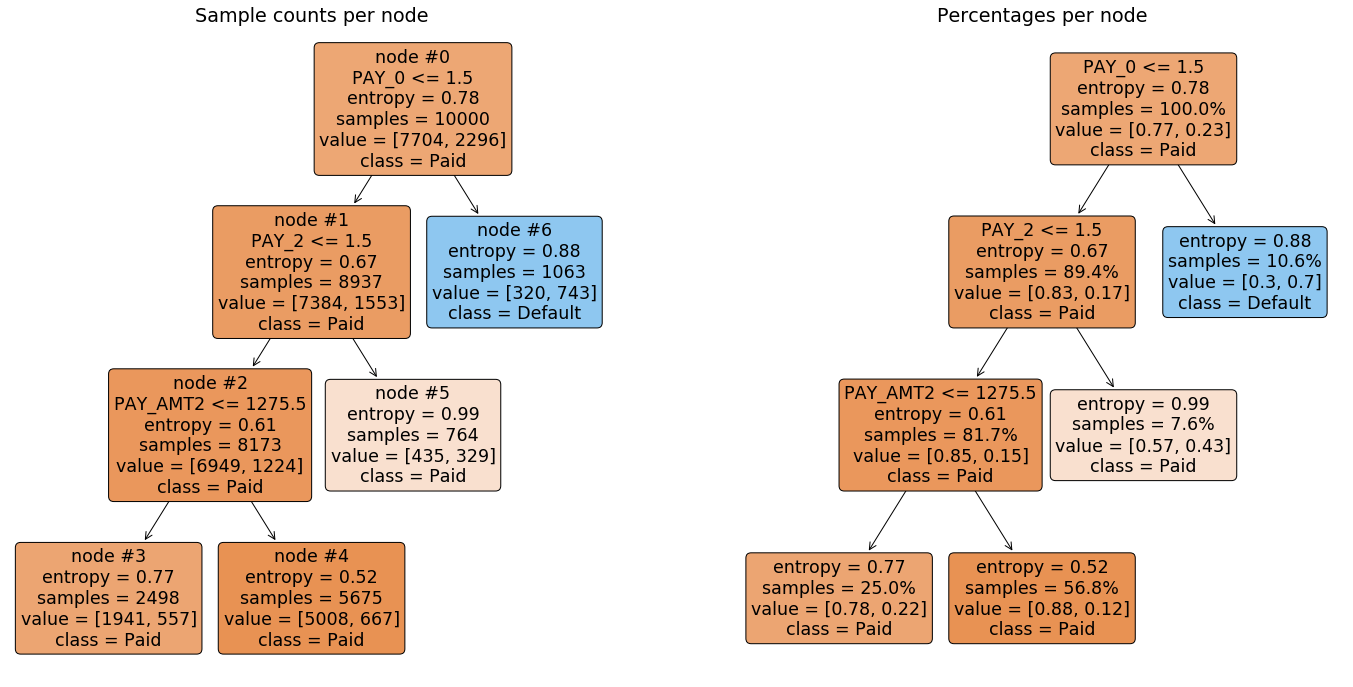

In [9]:
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
axs1 = plot_tree(estimator, filled=True, feature_names = list(X.columns), class_names = ['Paid', 'Default'], rounded = True, precision = 2, node_ids=True)
fig_1_a.set_title('Sample counts per node')

fig_1_b = plt.subplot(122)
axs2 = plot_tree(estimator, filled=True, feature_names = list(X.columns), class_names = ['Paid', 'Default'], rounded = True, precision = 2, proportion=True)
fig_1_b.set_title('Percentages per node')

plt.show()

### An important note on how we can practically apply the knowledge from this model.
- You can get the model to predict whether a new client will be 0 or 1 (pay or default). This is done with the method **predict**.
- A business objective typically involves quantifying risk (e.g. risk of a machine part breaking, a product failing, a customer defaulting, having cancer)
- Therefore, the business may be interested in predicting the probability of a client defaulting. This is done with the method **predict_proba**.
- Simply place the client in the leaf node through the tree and use either the majority class or the fraction of the samples in the same class.

### Scenario 1: Predict the class of customers in the test set. For each client, give a 0 or 1.

In [10]:
y_test_predicted = model_dt.predict(X_test)
y_test_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
# How many 0s an 1s does the model predict in the test set?
unique_elements, counts_elements = np.unique(y_test_predicted, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[    0     1]
 [17933  2067]]


### Scenario 2: Predict the probability of defaulting in the test set. For each client, give probability of 0 and 1 (they add up to 100%)

In [12]:
y_test_proba = model_dt.predict_proba(X_test)
y_test_proba

array([[0.77702162, 0.22297838],
       [0.77702162, 0.22297838],
       [0.88246696, 0.11753304],
       ...,
       [0.77702162, 0.22297838],
       [0.77702162, 0.22297838],
       [0.88246696, 0.11753304]])

In [13]:
# How many different probabilities of defaulting are there and how many clients in each?
unique_elements, counts_elements = np.unique(y_test_proba[:,1], return_counts=True)
print("Frequency of unique values of the said array:")
print(unique_elements)
print(counts_elements)

Frequency of unique values of the said array:
[0.11753304 0.22297838 0.43062827 0.69896519]
[11388  5038  1507  2067]


Text(-11.969999999999999, 0.5, 'Counts of clients')

<Figure size 360x360 with 0 Axes>

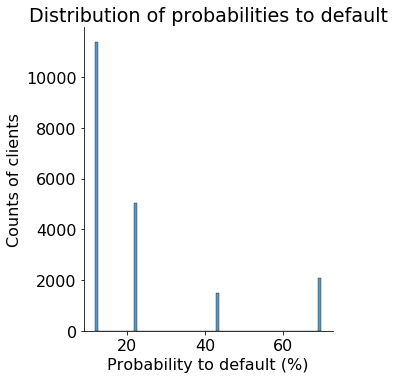

In [14]:
plt.figure(figsize=(5,5))
sns.displot(data = y_test_proba[:,1], x = 100*y_test_proba[:,1])
plt.title('Distribution of probabilities to default')
plt.xlabel('Probability to default (%)')
plt.ylabel('Counts of clients')

#### That is 4 buckets with 11.7, 22.3, 43.1 and 69.9% probability of default.
#### How do you think the class is predicted in Scenario 1?
### Another important question that business partners will ask is: which variable plays the biggest role? <br> You can answer the question by looking at the **features importance** metric. <br> Features importance is calculated as the normalized total reduction of the criterion (entropy or gini) brought by the feature.


In [15]:
# Calculate feature importances
importances = model_dt.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.73043506, 0.18387369, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08569125, 0.        ,
       0.        , 0.        , 0.        ])

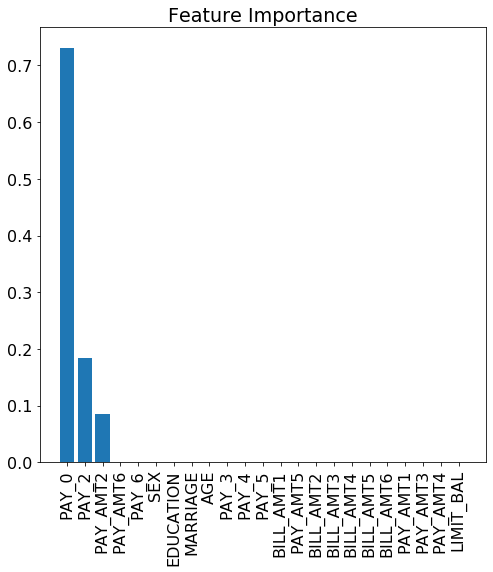

In [16]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [cc_data.columns[i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)
# Show plot
plt.show()

### Some basic performance metrics: The confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predicted)
print(cm)

[[15027   633]
 [ 2906  1434]]


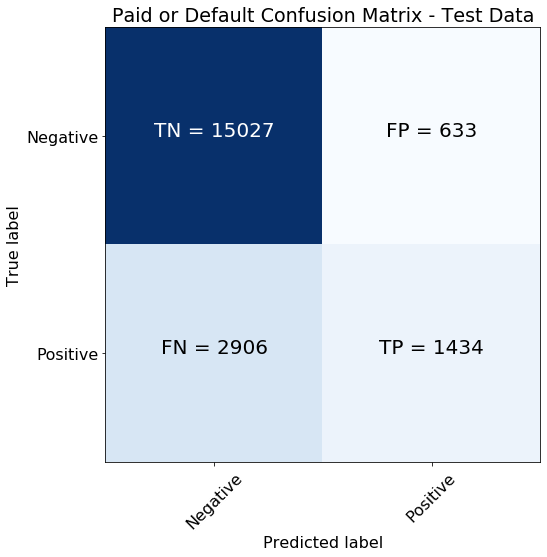

In [18]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Paid or Default Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

### Classification report + Accuracy score

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_test_predicted, target_names = ['Paid', 'Default']))

              precision    recall  f1-score   support

        Paid       0.84      0.96      0.89     15660
     Default       0.69      0.33      0.45      4340

    accuracy                           0.82     20000
   macro avg       0.77      0.64      0.67     20000
weighted avg       0.81      0.82      0.80     20000



In [20]:
accuracy_score(y_test, y_test_predicted, normalize = True) # Change normalize = True/False as well. DIAGONAL OVER ALL

0.82305

### Let's build the ROC curves from scratch

In [21]:
from sklearn.metrics import roc_curve, auc

In [22]:
# Scores for train set
scores_train = model_dt.predict_proba(X_train)[:, 1]
# Scores for test set
scores_test = model_dt.predict_proba(X_test)[:, 1]

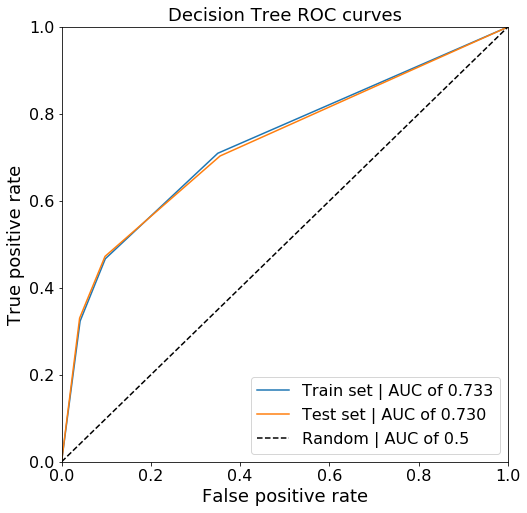

In [23]:
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

### Let's plot the decision boundary of the simple tree **(refer to notebook: 02_cards_LogReg for code details)**

In [24]:
xx, yy = np.mgrid[-2:8:1.1111, -2:8:1.1111] # The steps 1.1111 and 1.75 were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 10x10

# np.ones is a table full of ones with 100x23 dimension
# np.median calculates the median of every column in the X_train along axis=0 (i.e. column)
median_inputs = np.ones((100, 23)) * np.median(X_train, axis=0) 
pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

# Then, we replace the 5th and 11th column with the values of the grid
median_inputs[:,5] = grid[:,0]
median_inputs[:,6] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:13,:12] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table
df.style.apply(lambda x: ['background: grey' if (x.name == 5)|(x.name == 6)  else '' for i in x])


(100, 2)


,0,1,2,3,4,5,6,7,8,9,10,11
0,140000.000000,2.000000,2.000000,2.000000,34.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,22614.500000
1,140000.000000,2.000000,2.000000,2.000000,34.000000,-2.000000,-0.888900,0.000000,0.000000,0.000000,0.000000,22614.500000
2,140000.000000,2.000000,2.000000,2.000000,34.000000,-2.000000,0.222200,0.000000,0.000000,0.000000,0.000000,22614.500000
3,140000.000000,2.000000,2.000000,2.000000,34.000000,-2.000000,1.333300,0.000000,0.000000,0.000000,0.000000,22614.500000
4,140000.000000,2.000000,2.000000,2.000000,34.000000,-2.000000,2.444400,0.000000,0.000000,0.000000,0.000000,22614.500000
5,140000.000000,2.000000,2.000000,2.000000,34.000000,-2.000000,3.555500,0.000000,0.000000,0.000000,0.000000,22614.500000
6,140000.000000,2.000000,2.000000,2.000000,34.000000,-2.000000,4.666600,0.000000,0.000000,0.000000,0.000000,22614.500000
7,140000.000000,2.000000,2.000000,2.000000,34.000000,-2.000000,5.777700,0.000000,0.000000,0.000000,0.000000,22614.500000
8,140000.000000,2.000000,2.000000,2.000000,34.000000,-2.000000,6.888800,0.000000,0.000000,0.000000,0.000000,22614.500000
9,140000.000000,2.000000,2.000000,2.000000,34.000000,-2.000000,7.999900,0.000000,0.000000,0.000000,0.000000,22614.500000


In [25]:
probs = model_dt.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

[(-2, 8), Text(0, 0.5, 'PAY_2'), (-2, 8), Text(0.5, 0, 'PAY_0'), None]

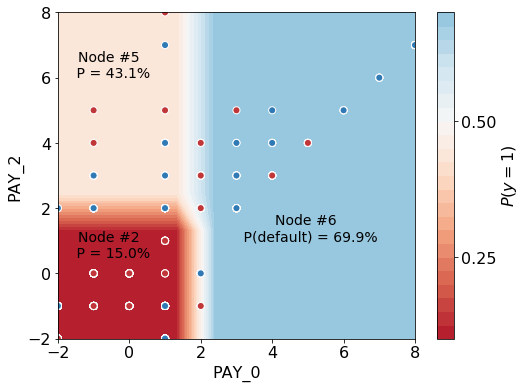

In [26]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train['PAY_0'][50:], X_train['PAY_2'][50:], c=y_train[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
plt.annotate('Node #6 \n P(default) = 69.9%', xy=(5,1), xycoords='data',horizontalalignment= 'center', fontsize = 14)
plt.annotate('Node #2 \n P = 15.0%', xy=(-0.5,0.5), xycoords='data',horizontalalignment= 'center', fontsize = 14)
plt.annotate('Node #5 \n P = 43.1%', xy=(-0.5,6.0), xycoords='data',horizontalalignment= 'center', fontsize = 14)

ax.set(aspect="auto",
       xlim=(-2, 8), ylim=(-2, 8),
       xlabel="PAY_0", ylabel="PAY_2")

### Notice something about the decision boundaries?
### They are lines (just like LogReg and SVM), **but** they can only be horizontal or vertical!!!